<a href="https://colab.research.google.com/github/EduardoMoraesRitter/spark/blob/main/SPARK_introdu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalando spark de outra forma

In [1]:
# instalar as dependências
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar xf spark-3.3.1-bin-hadoop3.tgz
!pip install -q findspark

In [2]:
#colocar varievel de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

# findspark é uma biblioteca que permite importar pacotes necessários para o funcionamento do PySpark
import findspark

# Iniciando o findspark
findspark.init()

#Instalando pyspark no Colab

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 44 kB/s 
     |████████████████████████████████| 199 kB 63.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=1435020782be0e32baa32db1f712eec75ff09d1a6c908ecbc8f3569e39b326b3
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


#Importando o SparkContext

In [2]:
from pyspark.sql import SparkSession

#Criando um contexto para o Spark e colocando na variavel **spark**

In [3]:
#master('local[*]') - quantas maquinas ou processadores vai usar paralelo
spark = SparkSession.builder \
    .master('local[*]') \
    .appName('Iniciando com Spark') \
    .config('spark.ui.port', '4050') \
    .getOrCreate()

spark

#ou ja cria o contexto direto
#spark = SparkContext()

#Para acessando o SparkUI no ColabSpark precisa do NGROK *opcional
para visializar os processoa nuvem precisa fazer atravez do tunel do ngrok

In [4]:
!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [5]:
#pegar o token no site: https://dashboard.ngrok.com/get-started/your-authtoken
get_ipython().system_raw('./ngrok authtoken 123')
get_ipython().system_raw('./ngrok http 4050 &')

In [7]:
!curl -s http://localhost:4040/api/tunnels

{"tunnels":[{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://99e1-34-83-166-70.ngrok.io","proto":"https","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}},{"name":"command_line (http)","uri":"/api/tunnels/command_line%20%28http%29","public_url":"http://99e1-34-83-166-70.ngrok.io","proto":"http","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}}],"uri":"/api/tunnels"}


#3 interfaces do Spark: 

*   RDD - Resilient Distributed Dataset ("Conjunto de dados distribuídos resilientes", elementos particinados nos nós dos clusters o perados em paralelos, nivel mais baixo; 
*   DataFrame é um super API de conjunto, similar pandas dataframe;
*   Dataset mais recente uma API tipagem forte que mistura o RDD com DF, dispovivel so em JAVA e SCALA;

In [4]:
#dataframe
data = [('Zeca', '35'), ('Eva', '29')]
colNames = ['Nome', 'Idade']
df = spark.createDataFrame(data, colNames)
df

#ou em JSON
# data = {'Nome': ['Zeca', 'Eva'], 'Idade': ['35', '29']}
# df = spark.createDataFrame(data)

DataFrame[Nome: string, Idade: string]

In [5]:
# visualizar 
df.show()

+----+-----+
|Nome|Idade|
+----+-----+
|Zeca|   35|
| Eva|   29|
+----+-----+



In [6]:
# converter pra panda e visualizar
df.toPandas()

,Nome,Idade
0,Zeca,35
1,Eva,29


#Conectar com google Driver e baixar aquivos

dados do governo https://www.gov.br/receitafederal/pt-br/assuntos/orientacao-tributaria/cadastros/consultas/dados-publicos-cnpj

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
path = '/content/drive/MyDrive/Colab Notebooks/dado_spark/'

In [9]:
# zipar
import zipfile

In [10]:
zipfile.ZipFile(path+'/empresas.zip', 'r').extractall(path)
zipfile.ZipFile(path+'/estabelecimentos.zip', 'r').extractall(path)
zipfile.ZipFile(path+'/socios.zip', 'r').extractall(path)

In [11]:
#ler os arquivos com spark
empresas = spark.read.csv(path+'/empresas', sep=';', inferSchema=True)
socios = spark.read.csv(path+'/socios', sep=';', inferSchema=True)
estabelecimentos = spark.read.csv(path+'/estabelecimentos', sep=';', inferSchema=True)

In [12]:
print(empresas.count())
print(estabelecimentos.count())
print(socios.count())

4585679
4836219
2046430


#Renomeando colunas 

In [18]:
empresas.limit(5).toPandas()

,_c0,_c1,_c2,_c3,_c4,_c5,_c6
0,306,FRANCAMAR REFRIGERACAO TECNICA S/C LTDA,2240,49,"0,00",1,None
1,1355,BRASILEIRO & OLIVEIRA LTDA,2062,49,"0,00",5,None
2,4820,"REGISTRO DE IMOVEIS, TABELIONATO 1 DE NOTAS E ...",3034,32,"0,00",5,None
3,5347,ROSELY APARECIDA MONTEIRO CALTABIANO FREITAS,2135,50,"0,00",5,None
4,6846,BADU E FILHOS TECIDOS LTDA,2062,49,"4000,00",1,None


In [19]:
# renomear colunas
empresasColNames = ['cnpj_basico', 'razao_social_nome_empresarial', 'natureza_juridica', 'qualificacao_do_responsavel', 'capital_social_da_empresa', 'porte_da_empresa', 'ente_federativo_responsavel']

In [20]:
# enumerate - retirna tuplas com indece
for index, value in enumerate(empresasColNames):
  empresas = empresas.withColumnRenamed(f'_c{index}', value)

empresas.limit(5).toPandas()

,cnpj_basico,razao_social_nome_empresarial,natureza_juridica,qualificacao_do_responsavel,capital_social_da_empresa,porte_da_empresa,ente_federativo_responsavel
0,306,FRANCAMAR REFRIGERACAO TECNICA S/C LTDA,2240,49,"0,00",1,None
1,1355,BRASILEIRO & OLIVEIRA LTDA,2062,49,"0,00",5,None
2,4820,"REGISTRO DE IMOVEIS, TABELIONATO 1 DE NOTAS E ...",3034,32,"0,00",5,None
3,5347,ROSELY APARECIDA MONTEIRO CALTABIANO FREITAS,2135,50,"0,00",5,None
4,6846,BADU E FILHOS TECIDOS LTDA,2062,49,"4000,00",1,None


In [21]:
estabsColNames = ['cnpj_basico', 'cnpj_ordem', 'cnpj_dv', 'identificador_matriz_filial', 'nome_fantasia', 'situacao_cadastral', 'data_situacao_cadastral', 'motivo_situacao_cadastral', 'nome_da_cidade_no_exterior', 'pais', 'data_de_inicio_atividade', 'cnae_fiscal_principal', 'cnae_fiscal_secundaria', 'tipo_de_logradouro', 'logradouro', 'numero', 'complemento', 'bairro', 'cep', 'uf', 'municipio', 'ddd_1', 'telefone_1', 'ddd_2', 'telefone_2', 'ddd_do_fax', 'fax', 'correio_eletronico', 'situacao_especial', 'data_da_situacao_especial']

for index, value in enumerate(estabsColNames):
  estabelecimentos = estabelecimentos.withColumnRenamed(f'_c{index}', value)

estabelecimentos.limit(5).toPandas()

,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nome_da_cidade_no_exterior,pais,...,municipio,ddd_1,telefone_1,ddd_2,telefone_2,ddd_do_fax,fax,correio_eletronico,situacao_especial,data_da_situacao_especial
0,1879,1,96,1,PIRAMIDE M. C.,8,20011029,1,None,NaN,...,7107,None,None,None,None,NaN,None,None,None,NaN
1,2818,1,43,1,None,8,20081231,71,None,NaN,...,7107,None,None,None,None,NaN,None,None,None,NaN
2,3110,1,7,1,None,8,19971231,1,None,NaN,...,7107,None,None,None,None,NaN,None,None,None,NaN
3,3733,1,80,1,None,8,20081231,71,None,NaN,...,7107,None,None,None,None,NaN,None,None,None,NaN
4,4628,3,27,2,EMBROIDERY & GIFT,8,19980429,1,None,NaN,...,7075,None,None,None,None,NaN,None,None,None,NaN


In [22]:
sociosColNames = ['cnpj_basico', 'identificador_de_socio', 'nome_do_socio_ou_razao_social', 'cnpj_ou_cpf_do_socio', 'qualificacao_do_socio', 'data_de_entrada_sociedade', 'pais', 'representante_legal', 'nome_do_representante', 'qualificacao_do_representante_legal', 'faixa_etaria']

for index, value in enumerate(sociosColNames):
  socios = socios.withColumnRenamed(f'_c{index}', value)

socios.limit(5).toPandas()

,cnpj_basico,identificador_de_socio,nome_do_socio_ou_razao_social,cnpj_ou_cpf_do_socio,qualificacao_do_socio,data_de_entrada_sociedade,pais,representante_legal,nome_do_representante,qualificacao_do_representante_legal,faixa_etaria
0,411,2,LILIANA PATRICIA GUASTAVINO,***678188**,22,19940725,NaN,***000000**,None,0,7
1,411,2,CRISTINA HUNDERTMARK,***637848**,28,19940725,NaN,***000000**,None,0,7
2,5813,2,CELSO EDUARDO DE CASTRO STEPHAN,***786068**,49,19940516,NaN,***000000**,None,0,8
3,5813,2,EDUARDO BERRINGER STEPHAN,***442348**,49,19940516,NaN,***000000**,None,0,5
4,14798,2,HANNE MAHFOUD FADEL,***760388**,49,19940609,NaN,***000000**,None,0,8


#Bibliotecas

In [25]:
# importando os tipos - https://spark.apache.org/docs/3.1.2/api/python/reference/pyspark.sql.html#data-types
from pyspark.sql.types import * 

# impostando funcoes - https://spark.apache.org/docs/3.1.2/api/python/reference/pyspark.sql.html#functions
from pyspark.sql.functions import *

In [26]:
#outra forma de criar o spark pelo schema
data = [{"name":"edu", "age":23}, {"name":"jose", "age":12}]

schema = StructType([
   StructField("name", StringType(), True),
   StructField("age", IntegerType(), True)])

df = spark.createDataFrame(data,schema)
df.collect()

[Row(name='edu', age=23), Row(name='jose', age=12)]

#Tratamento de dados, mudar os tipo do dado

In [29]:
empresas.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- razao_social_nome_empresarial: string (nullable = true)
 |-- natureza_juridica: integer (nullable = true)
 |-- qualificacao_do_responsavel: integer (nullable = true)
 |-- capital_social_da_empresa: double (nullable = true)
 |-- porte_da_empresa: integer (nullable = true)
 |-- ente_federativo_responsavel: string (nullable = true)



In [30]:
#separdor de descimal esta com virgula padrao brasil, padrao do spark é o ponto
empresas = empresas.withColumn('capital_social_da_empresa', regexp_replace('capital_social_da_empresa', ',', '.'))

#string para double
empresas = empresas.withColumn("capital_social_da_empresa", empresas['capital_social_da_empresa'].cast(DoubleType()))

empresas.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- razao_social_nome_empresarial: string (nullable = true)
 |-- natureza_juridica: integer (nullable = true)
 |-- qualificacao_do_responsavel: integer (nullable = true)
 |-- capital_social_da_empresa: double (nullable = true)
 |-- porte_da_empresa: integer (nullable = true)
 |-- ente_federativo_responsavel: string (nullable = true)



In [31]:
estabelecimentos.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- cnpj_ordem: integer (nullable = true)
 |-- cnpj_dv: integer (nullable = true)
 |-- identificador_matriz_filial: integer (nullable = true)
 |-- nome_fantasia: string (nullable = true)
 |-- situacao_cadastral: integer (nullable = true)
 |-- data_situacao_cadastral: integer (nullable = true)
 |-- motivo_situacao_cadastral: integer (nullable = true)
 |-- nome_da_cidade_no_exterior: string (nullable = true)
 |-- pais: integer (nullable = true)
 |-- data_de_inicio_atividade: integer (nullable = true)
 |-- cnae_fiscal_principal: integer (nullable = true)
 |-- cnae_fiscal_secundaria: string (nullable = true)
 |-- tipo_de_logradouro: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: string (nullable = true)
 |-- complemento: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cep: integer (nullable = true)
 |-- uf: string (nullable = true)
 |-- municipio: integer (nullable = true)
 |-- ddd_1: str

In [32]:
#mudar o formato de data - https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
estabelecimentos = estabelecimentos\
  .withColumn(
      "data_situacao_cadastral", 
      to_date(estabelecimentos.data_situacao_cadastral.cast(StringType()), 'yyyyMMDD')
  )\
  .withColumn(
      "data_de_inicio_atividade", 
      to_date(estabelecimentos.data_de_inicio_atividade.cast(StringType()), 'yyyyMMdd')
  )\
  .withColumn(
      "data_da_situacao_especial", 
      to_date(estabelecimentos.data_da_situacao_especial.cast(StringType()), 'yyyyMMdd')
  )\

estabelecimentos.printSchema()

estabelecimentos.limit(5).toPandas()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- cnpj_ordem: integer (nullable = true)
 |-- cnpj_dv: integer (nullable = true)
 |-- identificador_matriz_filial: integer (nullable = true)
 |-- nome_fantasia: string (nullable = true)
 |-- situacao_cadastral: integer (nullable = true)
 |-- data_situacao_cadastral: date (nullable = true)
 |-- motivo_situacao_cadastral: integer (nullable = true)
 |-- nome_da_cidade_no_exterior: string (nullable = true)
 |-- pais: integer (nullable = true)
 |-- data_de_inicio_atividade: date (nullable = true)
 |-- cnae_fiscal_principal: integer (nullable = true)
 |-- cnae_fiscal_secundaria: string (nullable = true)
 |-- tipo_de_logradouro: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: string (nullable = true)
 |-- complemento: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cep: integer (nullable = true)
 |-- uf: string (nullable = true)
 |-- municipio: integer (nullable = true)
 |-- ddd_1: string (n

,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nome_da_cidade_no_exterior,pais,...,municipio,ddd_1,telefone_1,ddd_2,telefone_2,ddd_do_fax,fax,correio_eletronico,situacao_especial,data_da_situacao_especial
0,1879,1,96,1,PIRAMIDE M. C.,8,None,1,None,NaN,...,7107,None,None,None,None,NaN,None,None,None,None
1,2818,1,43,1,None,8,None,71,None,NaN,...,7107,None,None,None,None,NaN,None,None,None,None
2,3110,1,7,1,None,8,None,1,None,NaN,...,7107,None,None,None,None,NaN,None,None,None,None
3,3733,1,80,1,None,8,None,71,None,NaN,...,7107,None,None,None,None,NaN,None,None,None,None
4,4628,3,27,2,EMBROIDERY & GIFT,8,None,1,None,NaN,...,7075,None,None,None,None,NaN,None,None,None,None


In [33]:
socios.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- identificador_de_socio: integer (nullable = true)
 |-- nome_do_socio_ou_razao_social: string (nullable = true)
 |-- cnpj_ou_cpf_do_socio: string (nullable = true)
 |-- qualificacao_do_socio: integer (nullable = true)
 |-- data_de_entrada_sociedade: integer (nullable = true)
 |-- pais: integer (nullable = true)
 |-- representante_legal: string (nullable = true)
 |-- nome_do_representante: string (nullable = true)
 |-- qualificacao_do_representante_legal: integer (nullable = true)
 |-- faixa_etaria: integer (nullable = true)



In [34]:
#mudar o formato de data 
socios = socios.withColumn("data_de_entrada_sociedade", 
      to_date(socios.data_de_entrada_sociedade.cast(StringType()), 'yyyyMMdd'))

socios.printSchema()

socios.limit(5).toPandas()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- identificador_de_socio: integer (nullable = true)
 |-- nome_do_socio_ou_razao_social: string (nullable = true)
 |-- cnpj_ou_cpf_do_socio: string (nullable = true)
 |-- qualificacao_do_socio: integer (nullable = true)
 |-- data_de_entrada_sociedade: date (nullable = true)
 |-- pais: integer (nullable = true)
 |-- representante_legal: string (nullable = true)
 |-- nome_do_representante: string (nullable = true)
 |-- qualificacao_do_representante_legal: integer (nullable = true)
 |-- faixa_etaria: integer (nullable = true)



,cnpj_basico,identificador_de_socio,nome_do_socio_ou_razao_social,cnpj_ou_cpf_do_socio,qualificacao_do_socio,data_de_entrada_sociedade,pais,representante_legal,nome_do_representante,qualificacao_do_representante_legal,faixa_etaria
0,411,2,LILIANA PATRICIA GUASTAVINO,***678188**,22,1994-07-25,NaN,***000000**,None,0,7
1,411,2,CRISTINA HUNDERTMARK,***637848**,28,1994-07-25,NaN,***000000**,None,0,7
2,5813,2,CELSO EDUARDO DE CASTRO STEPHAN,***786068**,49,1994-05-16,NaN,***000000**,None,0,8
3,5813,2,EDUARDO BERRINGER STEPHAN,***442348**,49,1994-05-16,NaN,***000000**,None,0,5
4,14798,2,HANNE MAHFOUD FADEL,***760388**,49,1994-06-09,NaN,***000000**,None,0,8


#distinct & dropDuplicates

https://towardsdatascience.com/distinct-vs-dropduplicates-in-spark-3e28af1f793c

In [35]:
empresas.distinct()

DataFrame[cnpj_basico: int, razao_social_nome_empresarial: string, natureza_juridica: int, qualificacao_do_responsavel: int, capital_social_da_empresa: double, porte_da_empresa: int, ente_federativo_responsavel: string]

In [44]:
empresas.dropDuplicates(['porte_da_empresa']).show()

+-----------+-----------------------------+-----------------+---------------------------+-------------------------+----------------+---------------------------+
|cnpj_basico|razao_social_nome_empresarial|natureza_juridica|qualificacao_do_responsavel|capital_social_da_empresa|porte_da_empresa|ente_federativo_responsavel|
+-----------+-----------------------------+-----------------+---------------------------+-------------------------+----------------+---------------------------+
|   13275457|         GRAN TIERRA BRAZC...|             2216|                         17|                      0.0|               0|                       null|
|   22648271|         ROBERTA DAMIANA D...|             2135|                         50|                      1.0|               1|                       null|
|   22652864|         MDS DUTRA SERVICO...|             2305|                         65|                  90000.0|               3|                       null|
|   22656490|         FUED CAMILO 

In [38]:
#valores unicos
empresas.select('porte_da_empresa').distinct().show()

+----------------+
|porte_da_empresa|
+----------------+
|            null|
|               1|
|               3|
|               5|
+----------------+



#seleções e consulta

In [17]:
#show segundo parametro truncar as colunas
empresas.select('*').show(5, False)

+----+--------------------------------------------------------------------------------------------+----+---+-------+---+----+
|_c0 |_c1                                                                                         |_c2 |_c3|_c4    |_c5|_c6 |
+----+--------------------------------------------------------------------------------------------+----+---+-------+---+----+
|306 |FRANCAMAR REFRIGERACAO TECNICA S/C LTDA                                                     |2240|49 |0,00   |1  |null|
|1355|BRASILEIRO & OLIVEIRA LTDA                                                                  |2062|49 |0,00   |5  |null|
|4820|REGISTRO DE IMOVEIS, TABELIONATO 1 DE NOTAS E TABELIONATO E REGISTRO DE CONSTRATOS MARITIMOS|3034|32 |0,00   |5  |null|
|5347|ROSELY APARECIDA MONTEIRO CALTABIANO FREITAS                                                |2135|50 |0,00   |5  |null|
|6846|BADU E FILHOS TECIDOS LTDA                                                                  |2062|49 |4000,00|1 

In [31]:
#selecinar algumas colunas
empresas.select('natureza_juridica', 'porte_da_empresa', 'capital_social_da_empresa').show(5)

+-----------------+----------------+-------------------------+
|natureza_juridica|porte_da_empresa|capital_social_da_empresa|
+-----------------+----------------+-------------------------+
|             2240|               1|                      0.0|
|             2062|               5|                      0.0|
|             3034|               5|                      0.0|
|             2135|               5|                      0.0|
|             2062|               1|                   4000.0|
+-----------------+----------------+-------------------------+
only showing top 5 rows



In [32]:
#incluir nova coluna com outro nome
socios\
  .select('nome_do_socio_ou_razao_social','faixa_etaria', 
          year('data_de_entrada_sociedade').alias("ano_entrada"))\
  .show(5)

+-----------------------------+------------+-----------+
|nome_do_socio_ou_razao_social|faixa_etaria|ano_entrada|
+-----------------------------+------------+-----------+
|         LILIANA PATRICIA ...|           7|       null|
|         CRISTINA HUNDERTMARK|           7|       null|
|         CELSO EDUARDO DE ...|           8|       null|
|         EDUARDO BERRINGER...|           5|       null|
|          HANNE MAHFOUD FADEL|           8|       null|
+-----------------------------+------------+-----------+
only showing top 5 rows



In [40]:
#a função concat_ws concatena (junta) várias colunas de strings em uma única coluna utilizando como separador a informação fornecida no primeiro argumento. 
#Outra função que utilizamos foi a substring_index que divide uma string de acordo com um delimitador específico e retorna a substring de acordo com sua posição. Observe que quando queremos pegar a última ocorrência podemos utilizar o índice -1.
socios\
    .select(
        concat_ws(
            ', ', 
            substring_index('nome_do_socio_ou_razao_social', ' ', -1), 
            substring_index('nome_do_socio_ou_razao_social', ' ', 1)
        ).alias('razao_social'), 
        'faixa_etaria')\
    .show(truncate=False)

+---------------------+------------+
|razao_social         |faixa_etaria|
+---------------------+------------+
|GUASTAVINO, LILIANA  |7           |
|HUNDERTMARK, CRISTINA|7           |
|STEPHAN, CELSO       |8           |
|STEPHAN, EDUARDO     |5           |
|FADEL, HANNE         |8           |
|FADEL, CLOD          |6           |
|ALGARVES, WALKYRIA   |7           |
|NUNES, SEBASTIAO     |5           |
|ADAMO, JOSE          |7           |
|ADAMO, ROSEMARY      |6           |
|MOTTA, MARCOS        |7           |
|ALENCAR, EDVAN       |5           |
|COLINO, JAIME        |6           |
|LEONE, SANDRA        |6           |
|VICENTE, LEIDA       |6           |
|REGO, DONZILIA       |8           |
|REGO, ISRAEL         |5           |
|TEIXEIRA, VALERIA    |6           |
|LIVRAMENTO, CARLOS   |5           |
|MOURA, IVAN          |7           |
+---------------------+------------+
only showing top 20 rows



#Como lidar com valores Vazio

In [59]:
# None e NaN
socios.limit(5).toPandas()

,cnpj_basico,identificador_de_socio,nome_do_socio_ou_razao_social,cnpj_ou_cpf_do_socio,qualificacao_do_socio,data_de_entrada_sociedade,pais,representante_legal,nome_do_representante,qualificacao_do_representante_legal,faixa_etaria
0,411,2,LILIANA PATRICIA GUASTAVINO,***678188**,22,1994-07-25,NaN,***000000**,None,0,7
1,411,2,CRISTINA HUNDERTMARK,***637848**,28,1994-07-25,NaN,***000000**,None,0,7
2,5813,2,CELSO EDUARDO DE CASTRO STEPHAN,***786068**,49,1994-05-16,NaN,***000000**,None,0,8
3,5813,2,EDUARDO BERRINGER STEPHAN,***442348**,49,1994-05-16,NaN,***000000**,None,0,5
4,14798,2,HANNE MAHFOUD FADEL,***760388**,49,1994-06-09,NaN,***000000**,None,0,8


In [60]:
# Nulos
socios.limit(5).show()

+-----------+----------------------+-----------------------------+--------------------+---------------------+-------------------------+----+-------------------+---------------------+-----------------------------------+------------+
|cnpj_basico|identificador_de_socio|nome_do_socio_ou_razao_social|cnpj_ou_cpf_do_socio|qualificacao_do_socio|data_de_entrada_sociedade|pais|representante_legal|nome_do_representante|qualificacao_do_representante_legal|faixa_etaria|
+-----------+----------------------+-----------------------------+--------------------+---------------------+-------------------------+----+-------------------+---------------------+-----------------------------------+------------+
|        411|                     2|         LILIANA PATRICIA ...|         ***678188**|                   22|               1994-07-25|null|        ***000000**|                 null|                                  0|           7|
|        411|                     2|         CRISTINA HUNDERTMARK|      

In [62]:
#filtrar colunas com nulos
#socios.select([c for c in socios.columns]).show()
#socios.select([count().alias(c) for c in socios.columns]).show()
socios.select([count(when(isnull(c), 1)).alias(c) for c in socios.columns]).show()

+-----------+----------------------+-----------------------------+--------------------+---------------------+-------------------------+-------+-------------------+---------------------+-----------------------------------+------------+
|cnpj_basico|identificador_de_socio|nome_do_socio_ou_razao_social|cnpj_ou_cpf_do_socio|qualificacao_do_socio|data_de_entrada_sociedade|   pais|representante_legal|nome_do_representante|qualificacao_do_representante_legal|faixa_etaria|
+-----------+----------------------+-----------------------------+--------------------+---------------------+-------------------------+-------+-------------------+---------------------+-----------------------------------+------------+
|          0|                     0|                          208|                1234|                    0|                        1|2038255|                  0|              1995432|                                  0|           0|
+-----------+----------------------+------------------------

In [63]:
#subirtituir colunas inteiras por zero
socios.na.fill(0).limit(5).toPandas()
#subirtiuir colunas string por -
socios.na.fill('-').limit(5).toPandas()

,cnpj_basico,identificador_de_socio,nome_do_socio_ou_razao_social,cnpj_ou_cpf_do_socio,qualificacao_do_socio,data_de_entrada_sociedade,pais,representante_legal,nome_do_representante,qualificacao_do_representante_legal,faixa_etaria
0,411,2,LILIANA PATRICIA GUASTAVINO,***678188**,22,1994-07-25,NaN,***000000**,-,0,7
1,411,2,CRISTINA HUNDERTMARK,***637848**,28,1994-07-25,NaN,***000000**,-,0,7
2,5813,2,CELSO EDUARDO DE CASTRO STEPHAN,***786068**,49,1994-05-16,NaN,***000000**,-,0,8
3,5813,2,EDUARDO BERRINGER STEPHAN,***442348**,49,1994-05-16,NaN,***000000**,-,0,5
4,14798,2,HANNE MAHFOUD FADEL,***760388**,49,1994-06-09,NaN,***000000**,-,0,8


In [40]:
empresas = empresas.na.fill(0)

empresas.select('porte_da_empresa').distinct().show()

+----------------+
|porte_da_empresa|
+----------------+
|               1|
|               3|
|               5|
|               0|
+----------------+



# Ordenação

In [64]:
#ordenação
socios\
  .select('nome_do_socio_ou_razao_social','faixa_etaria', year('data_de_entrada_sociedade').alias("ano_entrada"))\
  .orderBy('ano_entrada', ascending=False)\
  .show(5)

+-----------------------------+------------+-----------+
|nome_do_socio_ou_razao_social|faixa_etaria|ano_entrada|
+-----------------------------+------------+-----------+
|         KASSIANO RODRIGO ...|           4|       2021|
|         LEONARDO MENNA BA...|           5|       2021|
|         MANOEL ADRIANO CO...|           6|       2021|
|         ANTONOALDO GRANGE...|           5|       2021|
|         MARIA SUELY DE MOURA|           5|       2021|
+-----------------------------+------------+-----------+
only showing top 5 rows



In [65]:
#ordenação duas colunas
socios\
  .select('nome_do_socio_ou_razao_social','faixa_etaria', year('data_de_entrada_sociedade').alias("ano_entrada"))\
  .orderBy(['ano_entrada', 'faixa_etaria'], ascending=[False, False])\
  .show(5)

+-----------------------------+------------+-----------+
|nome_do_socio_ou_razao_social|faixa_etaria|ano_entrada|
+-----------------------------+------------+-----------+
|         MARIA RAIMUNDA DO...|           9|       2021|
|         MARIA JOSE DOMING...|           9|       2021|
|         DORIS PEREIRA GOM...|           9|       2021|
|         NADIR BICHARA CHUAHY|           9|       2021|
|         RAIMUNDA TORRES M...|           9|       2021|
+-----------------------------+------------+-----------+
only showing top 5 rows



#Filtros 
o comando where é um alias para o comando filter logo sao iguais

In [27]:
# um = ou dois == tanto faz, nao precisa do select
empresas\
  .filter("capital_social_da_empresa == 50")\
  .show(5, False)

+-----------+------------------------------------+-----------------+---------------------------+-------------------------+----------------+---------------------------+
|cnpj_basico|razao_social_nome_empresarial       |natureza_juridica|qualificacao_do_responsavel|capital_social_da_empresa|porte_da_empresa|ente_federativo_responsavel|
+-----------+------------------------------------+-----------------+---------------------------+-------------------------+----------------+---------------------------+
|17350147   |ERIK MARCELO DOS SANTOS 42107848858 |2135             |50                         |50.0                     |1               |null                       |
|17833214   |ALEXANDRE MACHADO LIMA 73750123772  |2135             |50                         |50.0                     |1               |null                       |
|20860830   |YASMIN MOURA DA FONSECA 13457709793 |2135             |50                         |50.0                     |1               |null                 

In [28]:
# varios filtros
socios\
  .select("nome_do_socio_ou_razao_social")\
  .filter(socios.nome_do_socio_ou_razao_social.startswith("JOAO"))\
  .filter(socios.nome_do_socio_ou_razao_social.endswith("SILVA"))\
  .limit(10).toPandas()

,nome_do_socio_ou_razao_social
0,JOAO AMARO DA SILVA
1,JOAO PINTO DA SILVA
2,JOAO BATISTA DA SILVA
3,JOAO OLAVO DA SILVA
4,JOAO MARIA DA SILVA
5,JOAO MATEUS AMARAL AVELINO DA SILVA
6,JOAO RITA FERREIRA DA SILVA
7,JOAO ROQUE DA SILVA
8,JOAO DIAS DA SILVA
9,JOAO BATISTA DA SILVA


In [ ]:
#formar de usar duas condiçoes

df\
    .filter("mes<=6")\
    .filter("ano=2009")\
    .show(truncate=False)

#usando AND
df\
    .filter("mes<=6 and ano==2009")\
    .show(truncate=False)

#usando &
df\
    .filter((df.mes <= 6) & (df.ano == 2009))\
    .show(truncate=False)

In [36]:
# LIKE
empresas\
  .select("razao_social_nome_empresarial", "natureza_juridica", "porte_da_empresa")\
  .filter(upper(empresas.razao_social_nome_empresarial).like("%RESTAURANTE%"))\
  .limit(10).toPandas()

,razao_social_nome_empresarial,natureza_juridica,porte_da_empresa
0,RESTAURANTE IMIGRANTE PORTUGUES LTDA.,2062,5
1,MORAIS & CARVALHO RESTAURANTE E PIZZARIA LTDA,2062,1
2,BAR E RESTAURANTE PAGANOTTO LTDA,2062,5
3,RODRIGUES & RODRIGUES RESTAURANTE LTDA,2062,5
4,TEXAS RANCH BAR RESTAURANTE PRODUCOES ARTISTIC...,2062,1
5,V V SANTOS RESTAURANTE BAR E ATIV DESPORTIVAS ...,2062,1
6,BAR E RESTAURANTE CASA DA QUINTA LTDA,2062,1
7,DON MUGO RESTAURANTE LTDA,2062,1
8,MARIA ROZA DOS SANTOS- BAR E RESTAURANTE,2135,5
9,GERACAO DE OURO - BAR E RESTAURANTE LTDA,2062,5


In [ ]:
#iniciar com a letra C
df\
    .filter(df.nome.like('C%'))\
    .show(truncate=False)

#Agrupamento, Agregação e Sumarizando os dados

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html

https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.summary.html


In [68]:
#groupBy com count
socios\
    .select(year('data_de_entrada_sociedade').alias('ano_entrada'))\
    .filter('ano_entrada >= 2010')\
    .groupBy('ano_entrada')\
    .count()\
    .orderBy('ano_entrada', ascending=True)\
    .show(truncate=False)

+-----------+------+
|ano_entrada|count |
+-----------+------+
|2010       |79337 |
|2011       |83906 |
|2012       |80101 |
|2013       |83919 |
|2014       |80590 |
|2015       |80906 |
|2016       |81587 |
|2017       |90221 |
|2018       |99935 |
|2019       |118248|
|2020       |125927|
|2021       |56316 |
+-----------+------+



In [69]:
#agregação é para criar um grupo de media(avg ou mean) e contagens(count)
empresas\
  .select('cnpj_basico', 'porte_da_empresa', 'capital_social_da_empresa')\
  .groupBy('porte_da_empresa')\
  .agg(
      avg("capital_social_da_empresa").alias('media_capital'),
      count('cnpj_basico').alias('quantidade')
  )\
  .orderBy('porte_da_empresa', ascending=True)\
  .show()

+----------------+------------------+----------+
|porte_da_empresa|     media_capital|quantidade|
+----------------+------------------+----------+
|            null|  8.35421888053467|      5985|
|               1|339994.53313506936|   3129043|
|               3|2601001.7677092673|    115151|
|               5| 708660.4208249798|   1335500|
+----------------+------------------+----------+



In [70]:
# descrição dos dados describe(summary)
empresas\
  .select("capital_social_da_empresa")\
  .summary()\
  .show()

#filtar apenas por essas .summary("count","mean","stddev","min","25%","50%","75%","max")

+-------+-------------------------+
|summary|capital_social_da_empresa|
+-------+-------------------------+
|  count|                  4585679|
|   mean|        503694.5478542675|
| stddev|     2.1118691490537405E8|
|    min|                      0.0|
|    25%|                      0.0|
|    50%|                   1000.0|
|    75%|                   7000.0|
|    max|         3.22014670262E11|
+-------+-------------------------+



#Função case(when)

https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.when.html

In [76]:
data = [ 
    ('LEILA', 'MATEMÁTICA', 5), 
    ('BRENO', 'MATEMÁTICA', 7), 
    ('LETÍCIA', 'MATEMÁTICA', 2), 
    ('CARLOS', 'FÍSICA', 2), 
    ('IVO', 'FÍSICA', 8), 
    ('MÁRCIA', 'FÍSICA', 10)
]
colNames = ['nome', 'materia', 'nota']
df = spark.createDataFrame(data, colNames)
df.show()

+-------+----------+----+
|   nome|   materia|nota|
+-------+----------+----+
|  LEILA|MATEMÁTICA|   5|
|  BRENO|MATEMÁTICA|   7|
|LETÍCIA|MATEMÁTICA|   2|
| CARLOS|    FÍSICA|   2|
|    IVO|    FÍSICA|   8|
| MÁRCIA|    FÍSICA|  10|
+-------+----------+----+



In [77]:
#otherwise é como else caso nao encontrado
df = df.withColumn('status', 
    when(
        df.nota >= 7, "APROVADO")\
        .otherwise("REPROVADO")
    )
df.show()

+-------+----------+----+---------+
|   nome|   materia|nota|   status|
+-------+----------+----+---------+
|  LEILA|MATEMÁTICA|   5|REPROVADO|
|  BRENO|MATEMÁTICA|   7| APROVADO|
|LETÍCIA|MATEMÁTICA|   2|REPROVADO|
| CARLOS|    FÍSICA|   2|REPROVADO|
|    IVO|    FÍSICA|   8| APROVADO|
| MÁRCIA|    FÍSICA|  10| APROVADO|
+-------+----------+----+---------+



In [78]:
df\
    .select('nota')\
    .summary('min', '25%', '50%', '75%', 'max')\
    .show()

+-------+----+
|summary|nota|
+-------+----+
|    min|   2|
|    25%|   2|
|    50%|   5|
|    75%|   8|
|    max|  10|
+-------+----+



In [79]:
df\
    .groupBy('status')\
    .count()\
    .orderBy('status', ascending=True)\
    .show()

+---------+-----+
|   status|count|
+---------+-----+
| APROVADO|    3|
|REPROVADO|    3|
+---------+-----+



#Junções X Unir

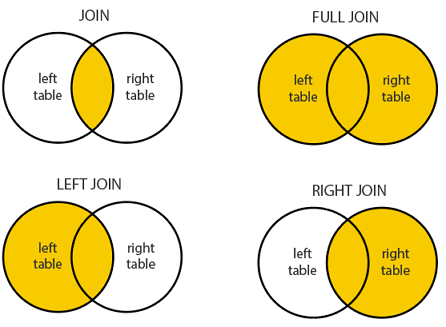

In [97]:
#join exemplo
produtos = spark.createDataFrame(
    [
        ('1', 'Bebidas', 'Água mineral'), 
        ('2', 'Limpeza', 'Sabão em pó')
    ],
    ['id', 'cat', 'prod']
)

produtos2 = spark.createDataFrame([ ('3', 'Frios', 'Queijo') ], ['id', 'cat', 'prod'])

impostos = spark.createDataFrame(
    [
        ('Bebidas', 0.15), 
        ('Banana', 0.05)
    ],
    ['cat', 'tax']
)

#unir produto com produto2
produtos.union(produtos2).show()

produtos.join(impostos, 'cat', how='inner').show()
produtos.join(impostos, 'cat', how='left').show()
produtos.join(impostos, 'cat', how='right').show()
produtos.join(impostos, 'cat', how='outer').show()

+---+-------+------------+
| id|    cat|        prod|
+---+-------+------------+
|  1|Bebidas|Água mineral|
|  2|Limpeza| Sabão em pó|
|  3|  Frios|      Queijo|
+---+-------+------------+

+-------+---+------------+----+
|    cat| id|        prod| tax|
+-------+---+------------+----+
|Bebidas|  1|Água mineral|0.15|
+-------+---+------------+----+

+-------+---+------------+----+
|    cat| id|        prod| tax|
+-------+---+------------+----+
|Bebidas|  1|Água mineral|0.15|
|Limpeza|  2| Sabão em pó|null|
+-------+---+------------+----+

+-------+----+------------+----+
|    cat|  id|        prod| tax|
+-------+----+------------+----+
|Bebidas|   1|Água mineral|0.15|
| Banana|null|        null|0.05|
+-------+----+------------+----+

+-------+----+------------+----+
|    cat|  id|        prod| tax|
+-------+----+------------+----+
| Banana|null|        null|0.05|
|Bebidas|   1|Água mineral|0.15|
|Limpeza|   2| Sabão em pó|null|
+-------+----+------------+----+



In [90]:
empresas_join = estabelecimentos.join(empresas, 'cnpj_basico', how='inner')
empresas_join.printSchema()
empresas_join

root
 |-- cnpj_basico: integer (nullable = true)
 |-- cnpj_ordem: integer (nullable = true)
 |-- cnpj_dv: integer (nullable = true)
 |-- identificador_matriz_filial: integer (nullable = true)
 |-- nome_fantasia: string (nullable = true)
 |-- situacao_cadastral: integer (nullable = true)
 |-- data_situacao_cadastral: date (nullable = true)
 |-- motivo_situacao_cadastral: integer (nullable = true)
 |-- nome_da_cidade_no_exterior: string (nullable = true)
 |-- pais: integer (nullable = true)
 |-- data_de_inicio_atividade: date (nullable = true)
 |-- cnae_fiscal_principal: integer (nullable = true)
 |-- cnae_fiscal_secundaria: string (nullable = true)
 |-- tipo_de_logradouro: string (nullable = true)
 |-- logradouro: string (nullable = true)
 |-- numero: string (nullable = true)
 |-- complemento: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- cep: integer (nullable = true)
 |-- uf: string (nullable = true)
 |-- municipio: integer (nullable = true)
 |-- ddd_1: string (n

DataFrame[cnpj_basico: int, cnpj_ordem: int, cnpj_dv: int, identificador_matriz_filial: int, nome_fantasia: string, situacao_cadastral: int, data_situacao_cadastral: date, motivo_situacao_cadastral: int, nome_da_cidade_no_exterior: string, pais: int, data_de_inicio_atividade: date, cnae_fiscal_principal: int, cnae_fiscal_secundaria: string, tipo_de_logradouro: string, logradouro: string, numero: string, complemento: string, bairro: string, cep: int, uf: string, municipio: int, ddd_1: string, telefone_1: string, ddd_2: string, telefone_2: string, ddd_do_fax: int, fax: string, correio_eletronico: string, situacao_especial: string, data_da_situacao_especial: date, razao_social_nome_empresarial: string, natureza_juridica: int, qualificacao_do_responsavel: int, capital_social_da_empresa: double, porte_da_empresa: int, ente_federativo_responsavel: string]

In [94]:
freq = empresas_join\
    .select( 'cnpj_basico', year('data_de_inicio_atividade').alias('data_de_inicio'))\
    .where('data_de_inicio >= 2010')\
    .groupBy('data_de_inicio')\
    .agg(count("cnpj_basico").alias("frequencia"))\
    .orderBy('data_de_inicio', ascending=True)

freq.show()

+--------------+----------+
|data_de_inicio|frequencia|
+--------------+----------+
|          2010|    154159|
|          2011|    172677|
|          2012|    232480|
|          2013|    198424|
|          2014|    202276|
|          2015|    212523|
|          2016|    265417|
|          2017|    237292|
|          2018|    275435|
|          2019|    325922|
|          2020|    400654|
|          2021|    153275|
+--------------+----------+



In [96]:
#lit é pra escrever literalmente um valor
freq.union(
    freq.select(
        lit('Total').alias('data_de_inicio'),
        sum(freq.frequencia).alias('frequencia')   
    )
).show()

+--------------+----------+
|data_de_inicio|frequencia|
+--------------+----------+
|          2010|    154159|
|          2011|    172677|
|          2012|    232480|
|          2013|    198424|
|          2014|    202276|
|          2015|    212523|
|          2016|    265417|
|          2017|    237292|
|          2018|    275435|
|          2019|    325922|
|          2020|    400654|
|          2021|    153275|
|         Total|   2830534|
+--------------+----------+



#SQL SessionSQL

https://community.cloudera.com/t5/Community-Articles/Spark-RDDs-vs-DataFrames-vs-SparkSQL/ta-p/246547

In [102]:
#criarar um view temporaria
empresas.createOrReplaceTempView("empresasView")

In [103]:
spark.sql("SELECT * FROM empresasView").show(5)

+-----------+-----------------------------+-----------------+---------------------------+-------------------------+----------------+---------------------------+
|cnpj_basico|razao_social_nome_empresarial|natureza_juridica|qualificacao_do_responsavel|capital_social_da_empresa|porte_da_empresa|ente_federativo_responsavel|
+-----------+-----------------------------+-----------------+---------------------------+-------------------------+----------------+---------------------------+
|        306|         FRANCAMAR REFRIGE...|             2240|                         49|                      0.0|               1|                       null|
|       1355|         BRASILEIRO & OLIV...|             2062|                         49|                      0.0|               5|                       null|
|       4820|         REGISTRO DE IMOVE...|             3034|                         32|                      0.0|               5|                       null|
|       5347|         ROSELY APARE

In [105]:
# aspas triplas permite pular linhas
spark.sql("""
  SELECT * 
    FROM empresasView
    WHERE capital_social_da_empresa = 50
""").show(5)

+-----------+-----------------------------+-----------------+---------------------------+-------------------------+----------------+---------------------------+
|cnpj_basico|razao_social_nome_empresarial|natureza_juridica|qualificacao_do_responsavel|capital_social_da_empresa|porte_da_empresa|ente_federativo_responsavel|
+-----------+-----------------------------+-----------------+---------------------------+-------------------------+----------------+---------------------------+
|   17350147|         ERIK MARCELO DOS ...|             2135|                         50|                     50.0|               1|                       null|
|   17833214|         ALEXANDRE MACHADO...|             2135|                         50|                     50.0|               1|                       null|
|   20860830|         YASMIN MOURA DA F...|             2135|                         50|                     50.0|               1|                       null|
|   22242856|         JOAO CESAR M

In [106]:
# grupo by com media
spark.sql("""
        SELECT porte_da_empresa, MEAN(capital_social_da_empresa) AS Media 
            FROM empresasView 
            GROUP BY porte_da_empresa
    """).show(5)

+----------------+------------------+
|porte_da_empresa|             Media|
+----------------+------------------+
|            null|  8.35421888053467|
|               1|339994.53313506936|
|               3|2601001.7677092673|
|               5| 708660.4208249798|
+----------------+------------------+



In [107]:
empresas_join.createOrReplaceTempView("empresasJoinView")

In [110]:
freq = spark.sql("""
        SELECT YEAR(data_de_inicio_atividade) AS data_de_inicio, COUNT(cnpj_basico) AS count
        FROM empresasJoinView 
        WHERE YEAR(data_de_inicio_atividade) >= 2010
        GROUP BY data_de_inicio
        ORDER BY data_de_inicio
    """)
freq.show()

+--------------+------+
|data_de_inicio| count|
+--------------+------+
|          2010|154159|
|          2011|172677|
|          2012|232480|
|          2013|198424|
|          2014|202276|
|          2015|212523|
|          2016|265417|
|          2017|237292|
|          2018|275435|
|          2019|325922|
|          2020|400654|
|          2021|153275|
+--------------+------+



In [111]:
freq.createOrReplaceTempView("freqView")

In [114]:
#union
spark.sql("""
        SELECT * FROM freqView 
        UNION ALL
        SELECT 'Total' as data_de_inicio, SUM(count) as count FROM freqView
    """).show()

+--------------+-------+
|data_de_inicio|  count|
+--------------+-------+
|          2010| 154159|
|          2011| 172677|
|          2012| 232480|
|          2013| 198424|
|          2014| 202276|
|          2015| 212523|
|          2016| 265417|
|          2017| 237292|
|          2018| 275435|
|          2019| 325922|
|          2020| 400654|
|          2021| 153275|
|         Total|2830534|
+--------------+-------+



In [ ]:
empresas_join.createOrReplaceTempView("empresasJoinView")
spark.sql("""
SELECT YEAR(data_de_inicio_atividade) AS data_de_inicio, COUNT(cnpj_basico) AS count
  FROM empresasJoinView 
  WHERE YEAR(data_de_inicio_atividade) >= 2010
  GROUP BY data_de_inicio
  ORDER BY data_de_inicio
""").show()
#ou
empresas_join\
    .select(year(empresas_join.data_de_inicio_atividade).alias('data_de_inicio'))\
    .where("data_de_inicio >= 2010")\
    .groupBy('data_de_inicio')\
    .count()\
    .orderBy('data_de_inicio')\
    .show()

#Formar de Armazenamento

##csv
https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrameWriter.csv.html

In [160]:
#salvado CSV modo de sobreescrever o aquivo, inferSchema nao é obrigatorio
empresas.write.csv(
    path='/content/drive/MyDrive/Colab Notebooks/dado_spark/empresas/csv',
    mode='overwrite',
    sep=';',
    header=True
)

In [166]:
#ler csv 
spark.read.csv(
    path='/content/drive/MyDrive/Colab Notebooks/dado_spark/empresas/csv',
    mode='overwrite',
    inferSchema=True,
    sep=';',
    header=True
).printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- razao_social_nome_empresarial: string (nullable = true)
 |-- natureza_juridica: integer (nullable = true)
 |-- qualificacao_do_responsavel: integer (nullable = true)
 |-- capital_social_da_empresa: double (nullable = true)
 |-- porte_da_empresa: integer (nullable = true)
 |-- ente_federativo_responsavel: string (nullable = true)



## Apache Parquet 
é um formato de armazenamento colunar, a compressão por colunas é mais eficiente, e as queries que utilizam mais de uma coluna também são mais eficientes, disponível para todos os projetos que pertencem ao ecossistema do Hadoop, como o próprio Spark, Diferentemente dos modelos "tradicionais" de armazenamento que usam uma abordagem orientada por linhas. - https://parquet.apache.org/ https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrameWriter.parquet.html

In [162]:
# salvar aquivo PARQUET mais rapido que o CSV e mais compactos
empresas.write.parquet(
    path='/content/drive/MyDrive/Colab Notebooks/dado_spark/empresas/parquet',
    mode='overwrite'
)

In [165]:
# leitura de parquet
empresas_parquet = spark.read.parquet('/content/drive/MyDrive/Colab Notebooks/dado_spark/empresas/parquet')
empresas_parquet.printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- razao_social_nome_empresarial: string (nullable = true)
 |-- natureza_juridica: integer (nullable = true)
 |-- qualificacao_do_responsavel: integer (nullable = true)
 |-- capital_social_da_empresa: double (nullable = true)
 |-- porte_da_empresa: integer (nullable = true)
 |-- ente_federativo_responsavel: string (nullable = true)



## Arquivos ORC
projeto do ORC foi criado em 2013 como uma iniciativa de acelerar o Hive e reduzir o armazenamento no Hadoop.

O foco era habilitar o processamento de alta velocidade e reduzir o tamanho dos arquivos.

Assim como o PARQUET, ORC é um formato de arquivo colunar. Ele é otimizado para grandes leituras de streaming, mas com suporte integrado para localizar as linhas necessárias rapidamente. 

 O armazenamento de dados em formato colunar permite ler, descompactar e processar apenas os valores necessários para a consulta.

Muitos grandes usuários do Hadoop adotaram o ORC. Por exemplo, o Facebook usa ORC para salvar dezenas de petabytes em seu data warehouse e demonstrou que ORC é significativamente mais rápido do que RCFILE ou PARQUET.

https://orc.apache.org/specification/

https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrameWriter.orc.html


In [168]:
# gravar em orc
empresas.write.orc('/content/drive/MyDrive/Colab Notebooks/dado_spark/empresas/orc/')

In [169]:
# ler orc
spark.read.orc('/content/drive/MyDrive/Colab Notebooks/dado_spark/empresas/orc/').printSchema()

root
 |-- cnpj_basico: integer (nullable = true)
 |-- razao_social_nome_empresarial: string (nullable = true)
 |-- natureza_juridica: integer (nullable = true)
 |-- qualificacao_do_responsavel: integer (nullable = true)
 |-- capital_social_da_empresa: double (nullable = true)
 |-- porte_da_empresa: integer (nullable = true)
 |-- ente_federativo_responsavel: string (nullable = true)



##Partição

In [171]:
#coalesce so pode diminuir o numero de particoes
empresas.coalesce(1).write.csv(
    path='/content/drive/MyDrive/Colab Notebooks/dado_spark/empresas/csv_unico',
    mode='overwrite',
    sep=';',
    header=True
)

In [41]:
#partitionBy segundo uma coluna nos valores 
empresas.write.parquet(
    path='/content/drive/MyDrive/Colab Notebooks/dado_spark/empresas/parquet_partitionBy',
    mode='overwrite',
    partitionBy='porte_da_empresa'
)

#Encerrar o spark

In [ ]:
spark.stop()